In [348]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Jaccard Coefficient Comparison

In [349]:
jaccard_results = pd.read_csv('jaccard_results.csv')
elapsed_results = pd.read_csv('elapsed_results.csv')
steps_results = pd.read_csv('steps_results.csv')

In [350]:
jc_notredame = jaccard_results[jaccard_results['dataset'] == 'web-NotreDame.txt']
jc_stanford = jaccard_results[jaccard_results['dataset'] == 'web-Stanford.txt']
jc_berk = jaccard_results[jaccard_results['dataset'] == 'web-BerkStan.txt']
jc_gogole = jaccard_results[jaccard_results['dataset'] == 'web-Google.txt']

x_labels_20 = [f'2\u2070', f'2\u00B9', f'2\u00B2', f'2\u00B3', f'2\u2074', f'2\u2075',
            f'2\u2076', f'2\u2077', f'2\u2078', f'2\u2079',
            f'2\u00B9\u2070', f'2\u00B9\u00B9', f'2\u00B9\u00B2',
            f'2\u00B9\u00B3', f'2\u00B9\u2074', f'2\u00B9\u2075',
            f'2\u00B9\u2076', f'2\u00B9\u2077', f'2\u00B9\u2078', '#Nodes']


x_labels_21 = [f'2\u2070', f'2\u00B9', f'2\u00B2', f'2\u00B3', f'2\u2074', f'2\u2075',
            f'2\u2076', f'2\u2077', f'2\u2078', f'2\u2079',
            f'2\u00B9\u2070', f'2\u00B9\u00B9', f'2\u00B9\u00B2',
            f'2\u00B9\u00B3', f'2\u00B9\u2074', f'2\u00B9\u2075',
            f'2\u00B9\u2076', f'2\u00B9\u2077', f'2\u00B9\u2078', f'2\u00B9\u2079',  '#Nodes']

In [351]:
def plot_jaccards(ds, ds_name):
  top_k_nd = ds['top_k']

  top_k_pow = np.arange(len(top_k_nd))

  plt.figure(figsize=(20,10))

  plt.plot(top_k_pow, ds['ID_A'], label='In Degree VS Authority', color='tab:red', linewidth=2.5, linestyle='solid')
  plt.plot(top_k_pow, ds['ID_H'], label='In Degree VS Hub', color='tab:orange', linewidth=2.5, linestyle='dashed')
  plt.plot(top_k_pow, ds['ID_PR'], label='In Degree VS PageRank', color='tab:green', linewidth=2.5, linestyle='solid')
  plt.plot(top_k_pow, ds['PR_A'], label='PageRank VS Authority', color='tab:brown', linewidth=2.5, linestyle='dashed')
  plt.plot(top_k_pow, ds['PR_H'], label='PageRank VS Hub', color='tab:pink', linewidth=2.5, linestyle='solid')
  plt.plot(top_k_pow, ds['A_H'], label='Authority VS Hub', color='tab:cyan', linewidth=2.5, linestyle='dashed')
  if len(top_k_nd) == 20: plt.xticks(top_k_pow, x_labels_20, fontsize=15)
  else: plt.xticks(top_k_pow, x_labels_21, fontsize=15)
  plt.yticks(fontsize=15)


  plt.legend(loc=2, prop={'size': 15})

  plt.ylabel('Jaccard Coefficient', fontsize=20)
  plt.xlabel('Top K Nodes', fontsize=20)
  plt.title(ds_name, fontsize=25)
  plt.grid()

  plt.show()

In [352]:
def plot_step(ds_steps, idx_ds, ds_str):
  fig = plt.figure(figsize = (10, 5))

  # creating the bar plot

  algorithms = ['PageRank', 'HITS']
  x = range(len(algorithms))
  steps = list([ds_steps['PR'][idx_ds], ds_steps['HITS'][idx_ds]])
  colors = ['orange', 'green']

  bars = plt.bar(x, steps, width = 1, tick_label=algorithms, color=colors)

  plt.xlabel("Algorithms")
  plt.ylabel("Number of Steps to Converge")
  plt.title(f"{ds_str} - Algorithms Steps")

  for bar, step in zip(bars, steps):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(step), ha='center', va='bottom')

  plt.show()


def plot_elapsed(ds_elapsed, idx_ds, ds_str):

  fig = plt.figure(figsize = (10, 5))

  # creating the bar plot

  algorithms = ['PageRank', 'HITS', 'InDegree']
  x = range(len(algorithms))
  elapsed = list([ds_elapsed['PR'][idx_ds], ds_elapsed['HITS'][idx_ds], ds_elapsed['ID'][idx_ds]])
  colors = ['orange', 'green', 'red']

  bars = plt.bar(x, elapsed, width = 1, tick_label=algorithms, color=colors)

  plt.xlabel("Algorithms")
  plt.ylabel("Elapsed ms to Converge")
  plt.title(f"{ds_str} - Algorithms Elapsed ms")

  for bar, step in zip(bars, elapsed):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(step), ha='center', va='bottom')

  plt.show()

## NotreDame Dataset

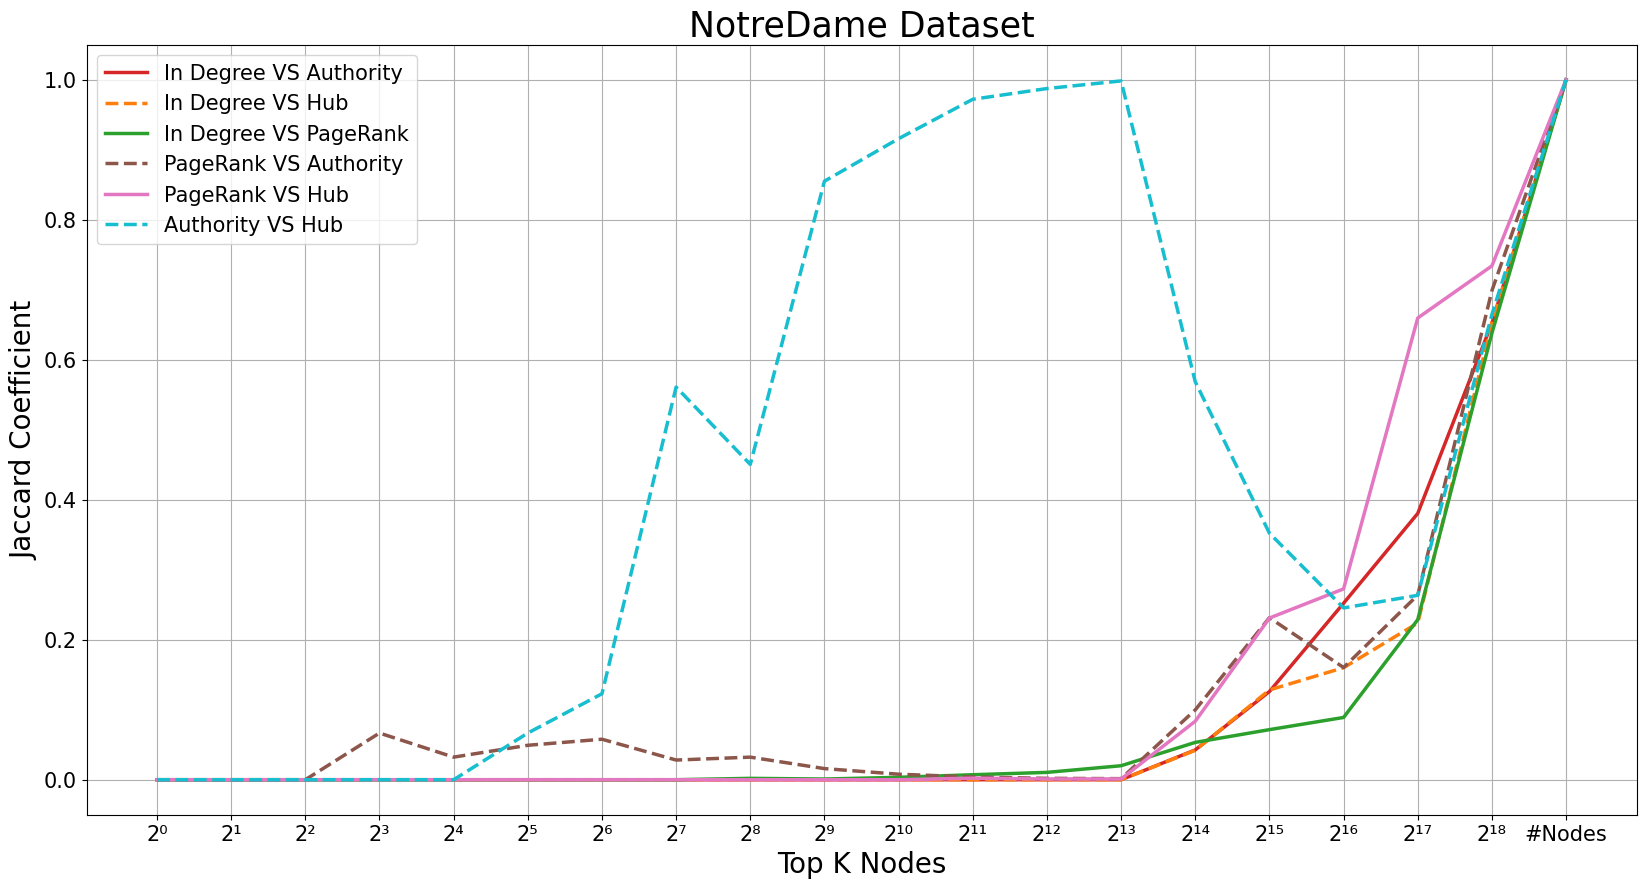

In [353]:
plot_jaccards(jc_notredame, 'NotreDame Dataset')

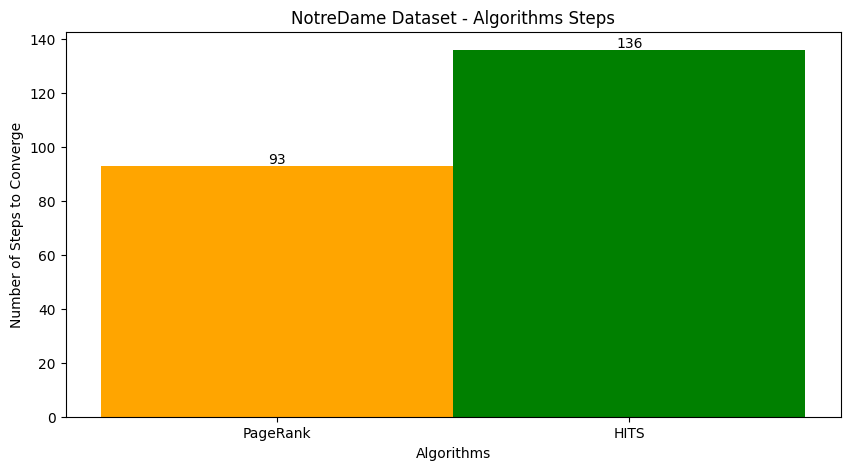

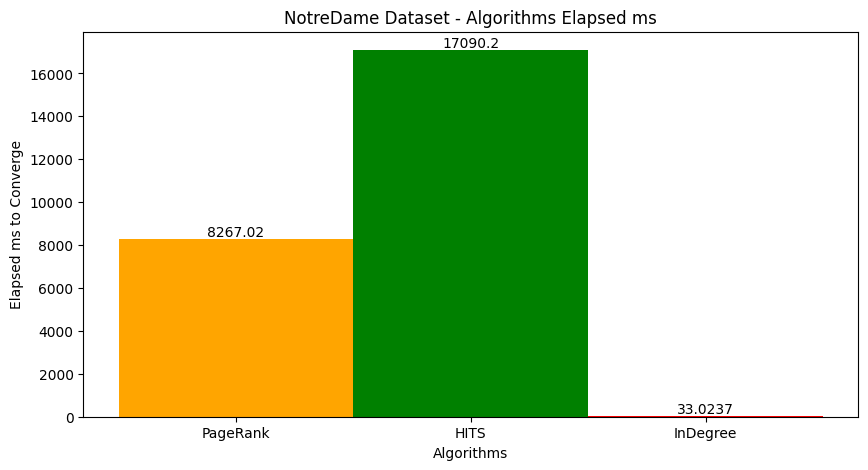

In [355]:
plot_step(steps_results, 0, 'NotreDame Dataset')
plot_elapsed(elapsed_results, 0, 'NotreDame Dataset')

## Stanford Dataset

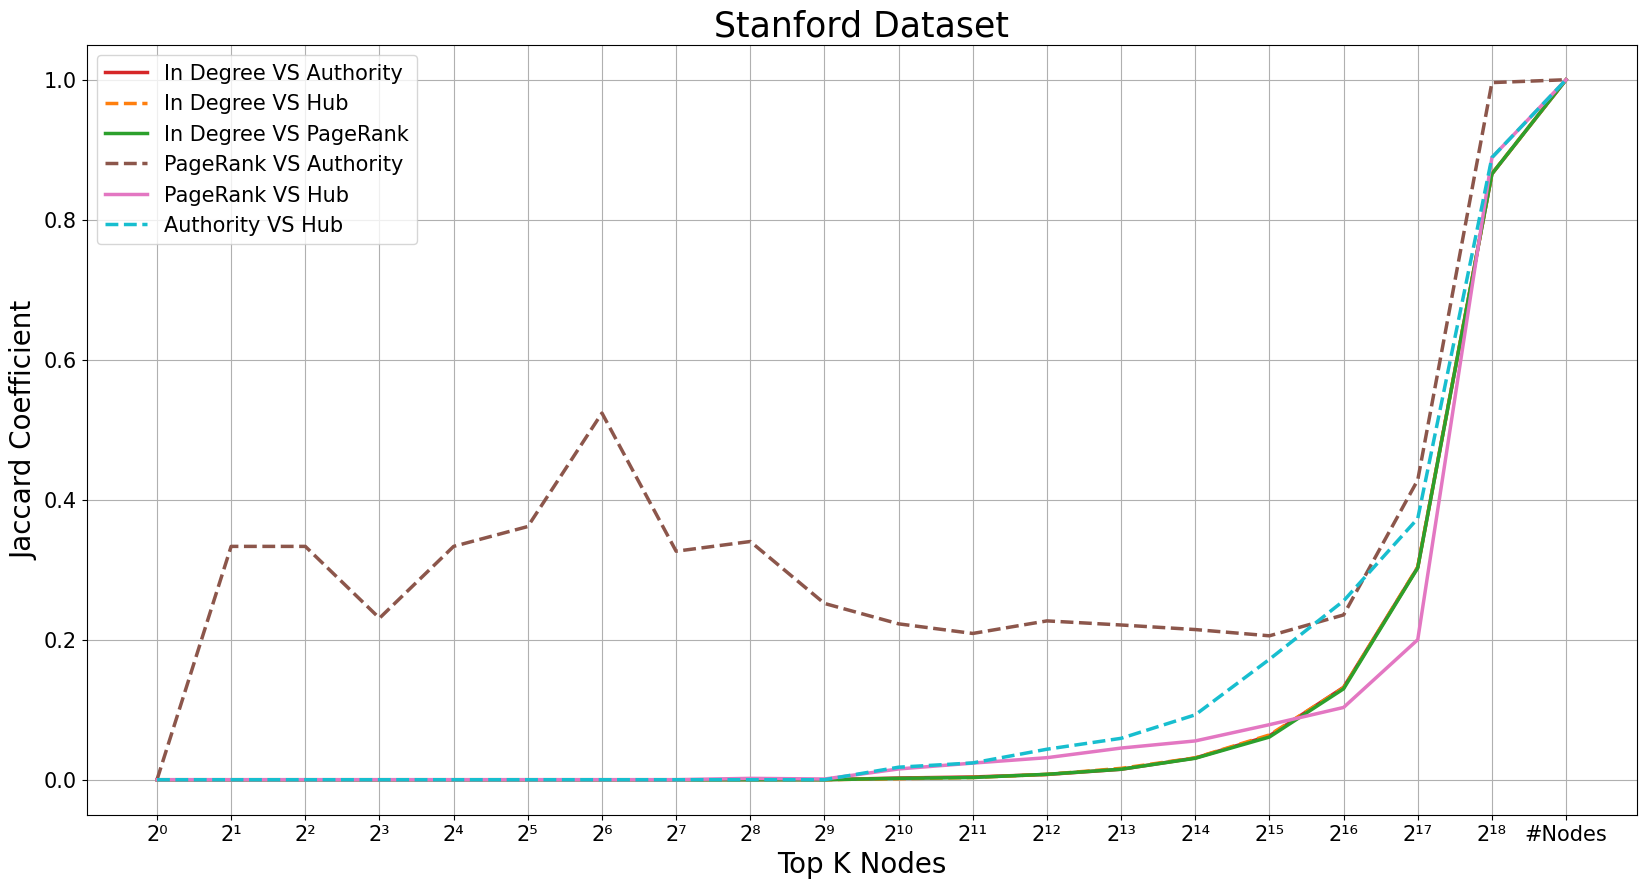

In [356]:
plot_jaccards(jc_stanford, 'Stanford Dataset')

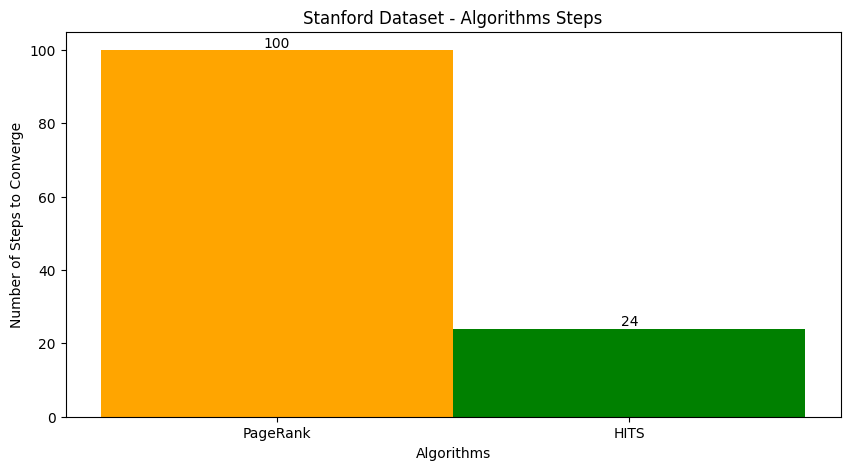

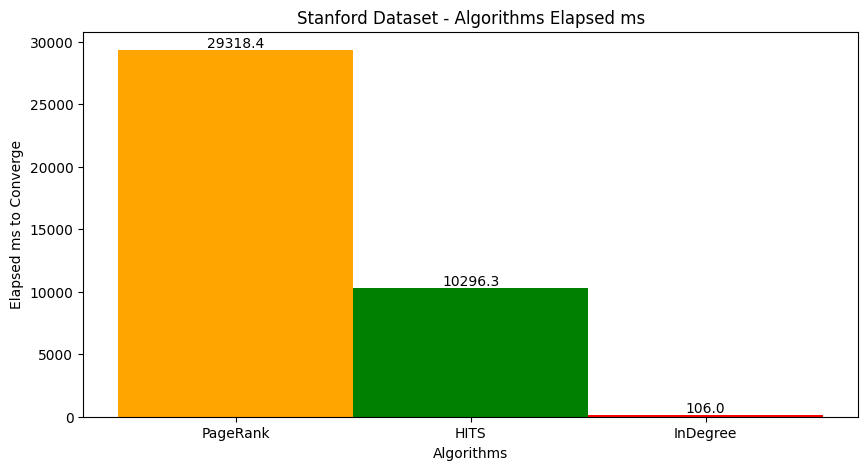

In [357]:
plot_step(steps_results, 1, 'Stanford Dataset')
plot_elapsed(elapsed_results, 1, 'Stanford Dataset')

## BerkStan Dataset

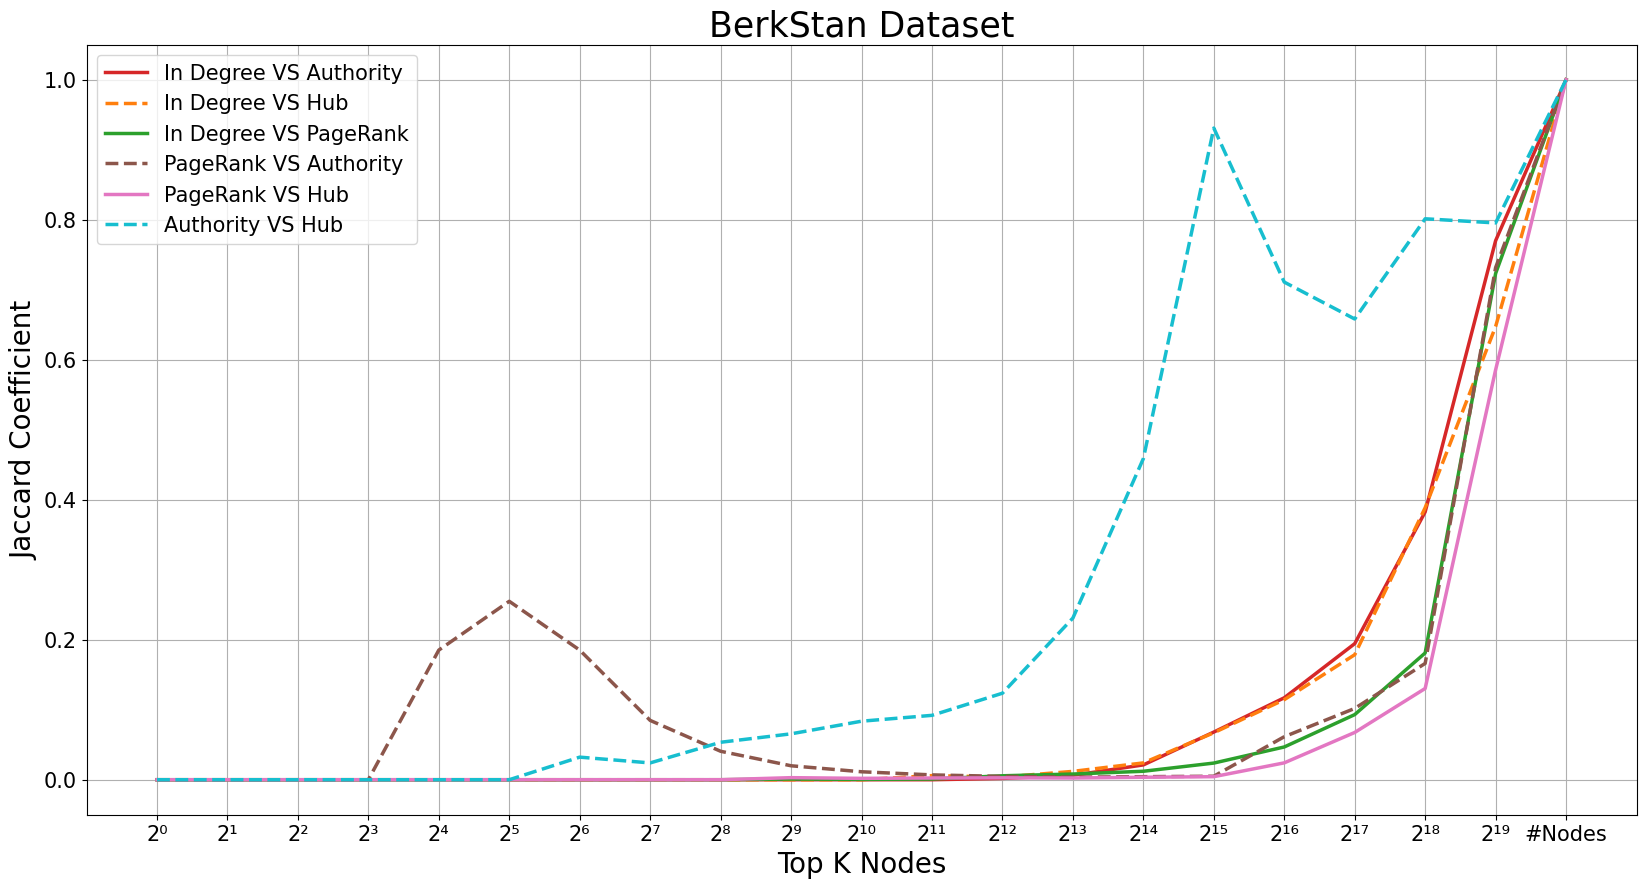

In [358]:
plot_jaccards(jc_berk, 'BerkStan Dataset')

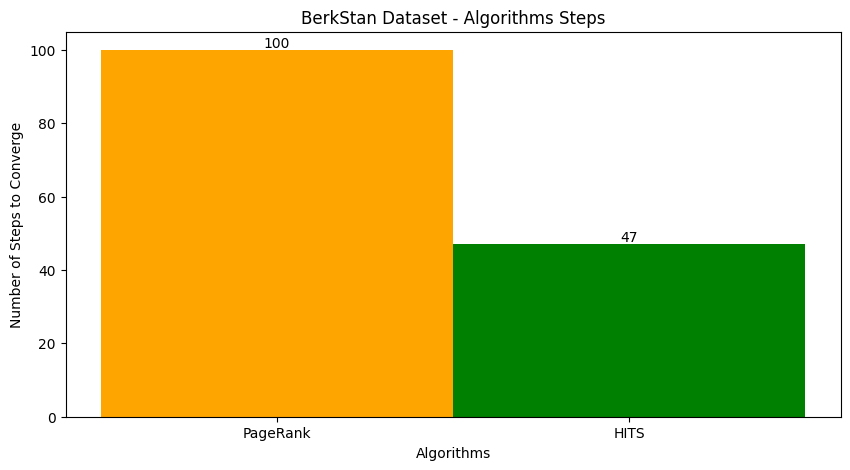

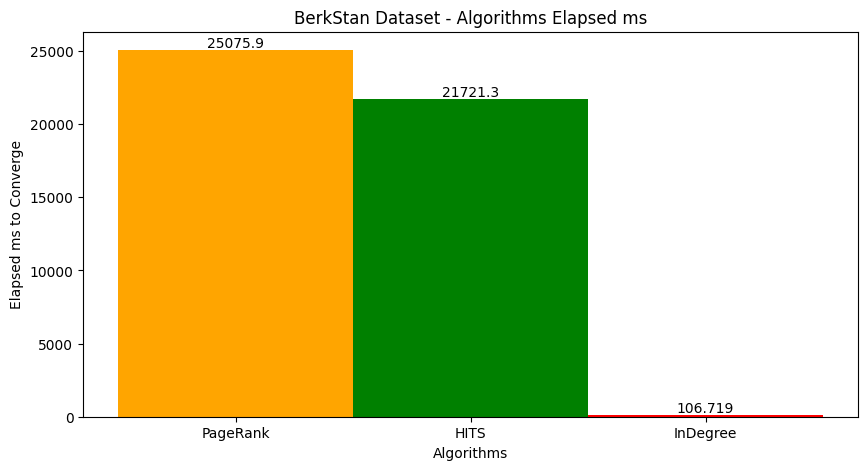

In [359]:
plot_step(steps_results, 2, 'BerkStan Dataset')
plot_elapsed(elapsed_results, 2, 'BerkStan Dataset')

## Google Dataset

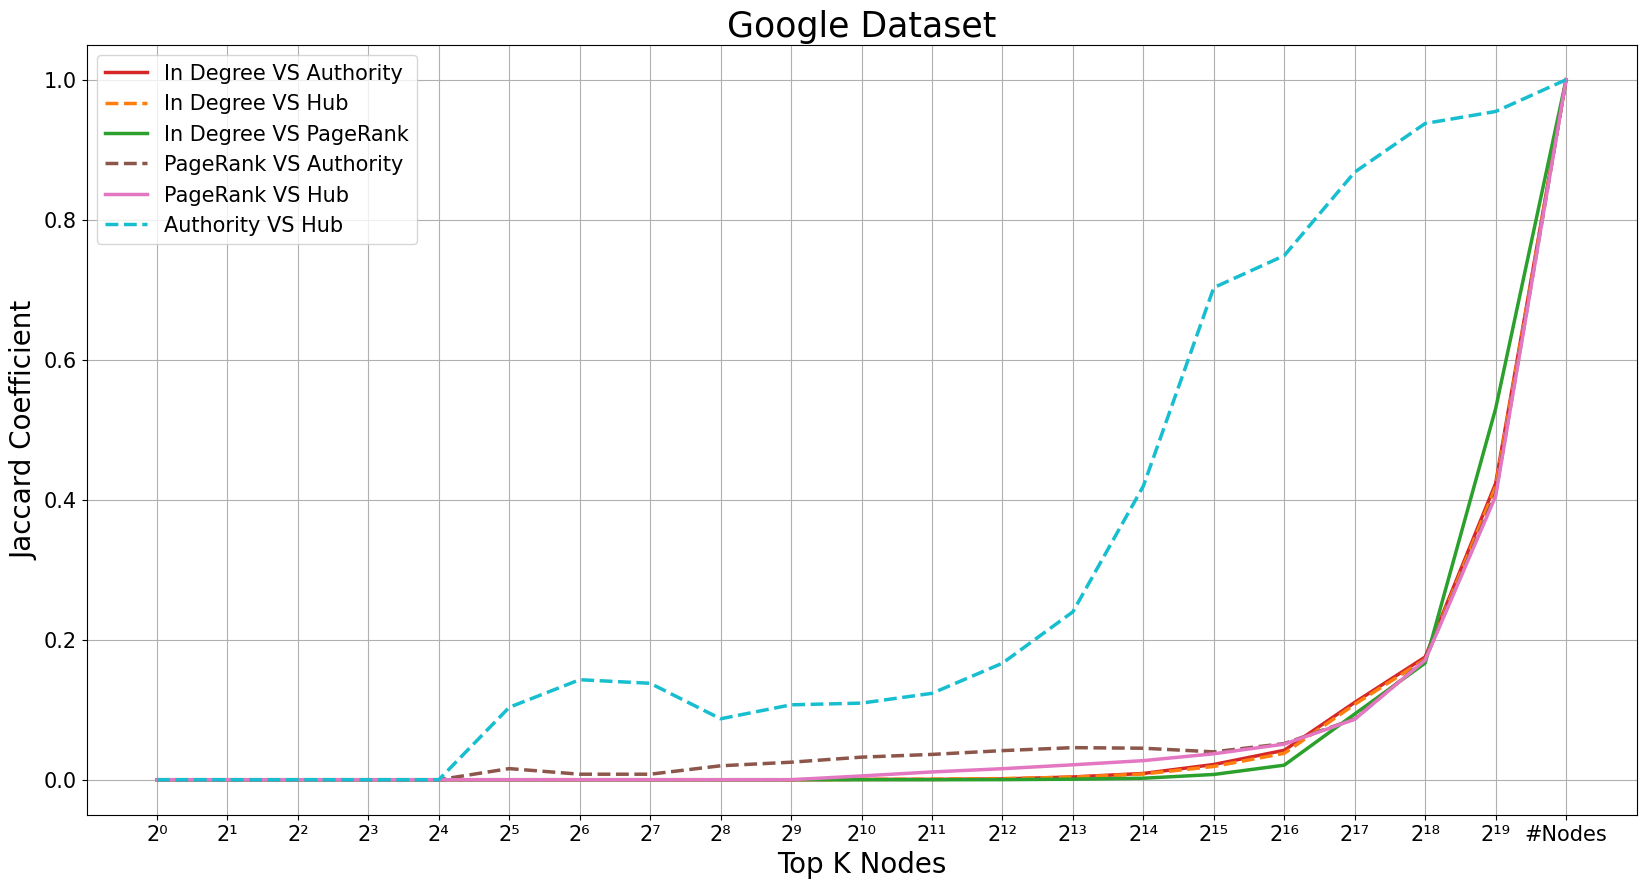

In [360]:
plot_jaccards(jc_gogole, 'Google Dataset')

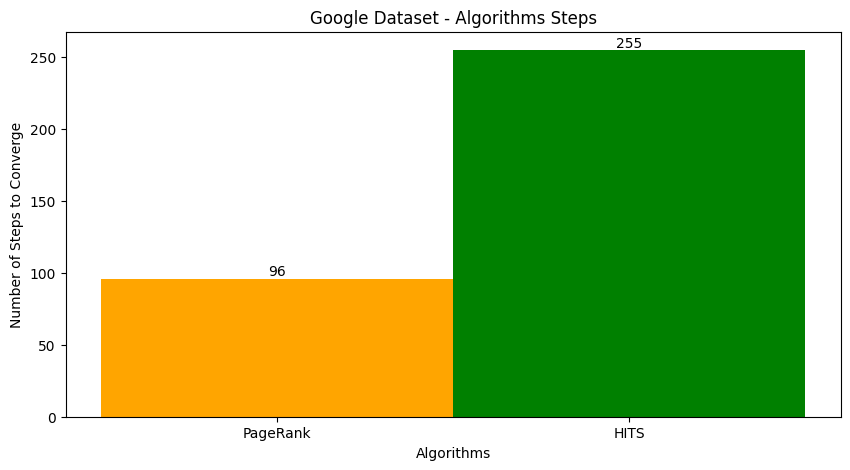

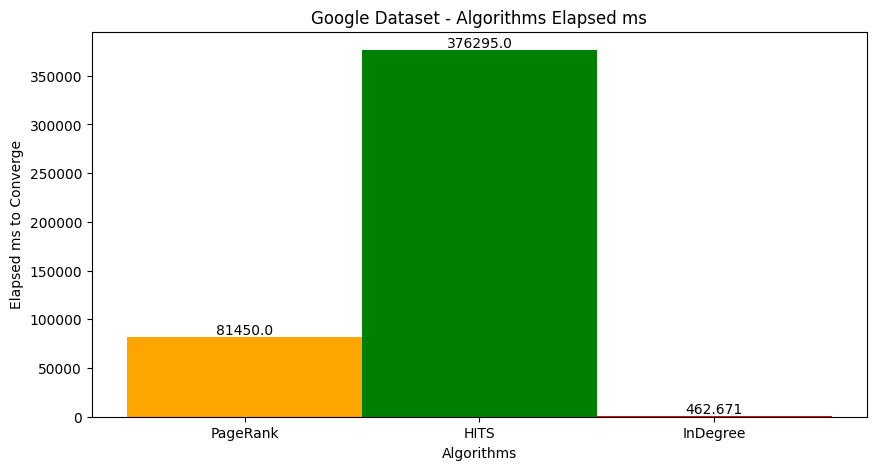

In [361]:
plot_step(steps_results, 3, 'Google Dataset')
plot_elapsed(elapsed_results, 3, 'Google Dataset')

# Summary of Elapsed Comparison

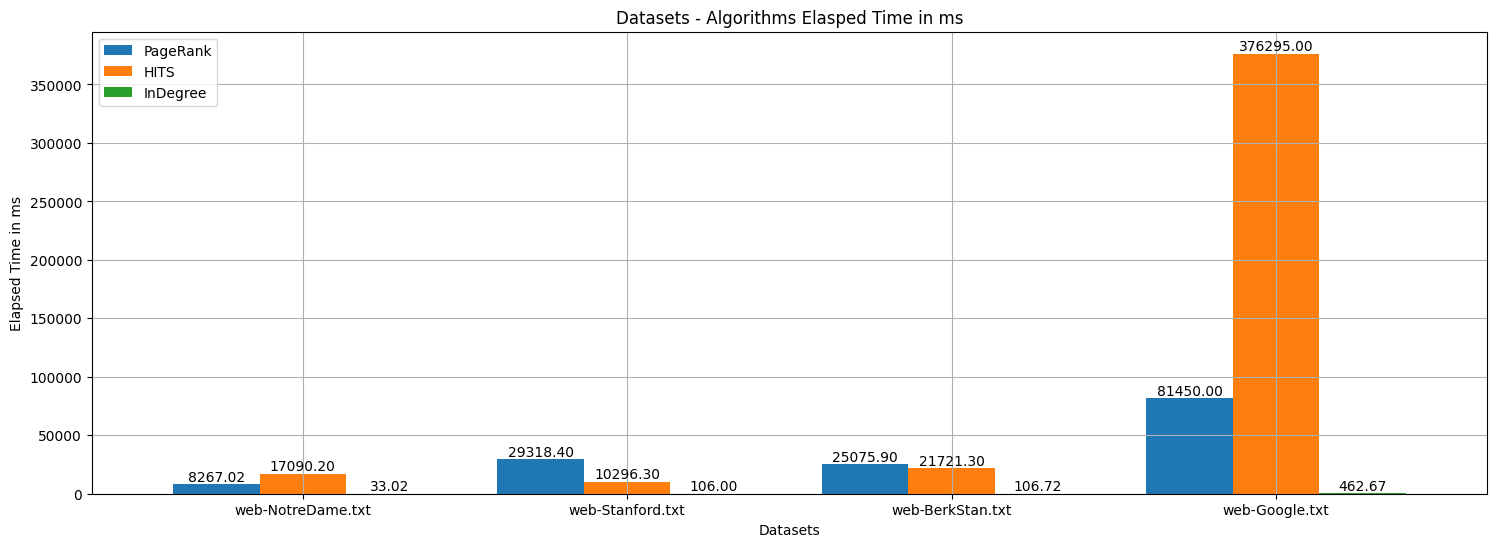

In [362]:
# Set the dataset column as the index
elapsed_results.set_index("dataset", inplace=True)

# Plotting
ax = elapsed_results.plot(kind="bar", figsize=(18, 6), width=0.8)
plt.xlabel("Datasets")#, fontsize=20)
plt.ylabel("Elapsed Time in ms")#, fontsize=20)
plt.title("Datasets - Algorithms Elasped Time in ms")#, fontsize=25)
plt.xticks(rotation=0)#, fontsize=15)
#plt.yticks(fontsize=15)
plt.legend(title="Algorithms")
plt.grid()
ax.legend(loc=2, labels=["PageRank", "HITS", "InDegree"]) #, prop={'size': 15}

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')#, fontsize=15)

plt.show()

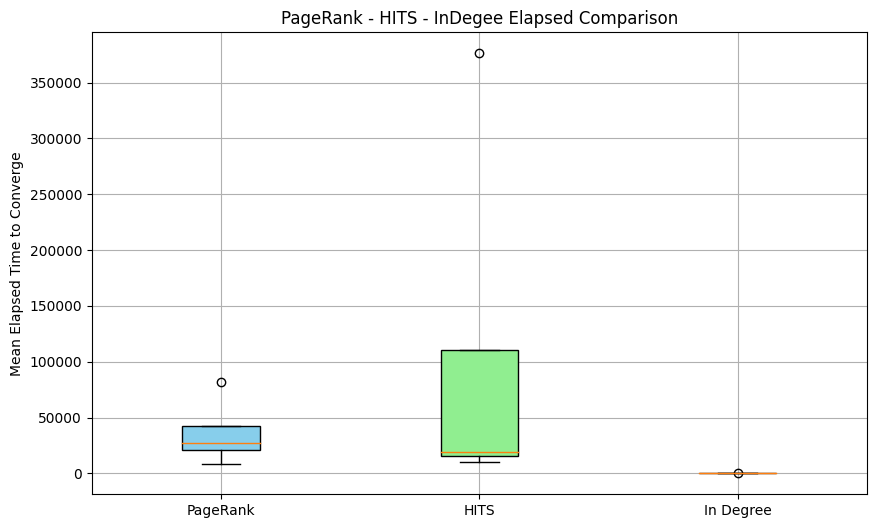

In [363]:
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(elapsed_results[['PR', 'HITS', 'ID']].to_numpy(),
            patch_artist=True,
            labels=['PageRank', 'HITS', 'In Degree'])  # will be used to label x-ticks)

# Define colors for the boxes
box_colors = ['skyblue', 'lightgreen', 'lightcoral']

# Color the boxes using the boxprops dictionary
for box, color in zip(boxplot['boxes'], box_colors):
    box.set_facecolor(color)

plt.ylabel("Mean Elapsed Time to Converge")
plt.title("PageRank - HITS - InDegee Elapsed Comparison")
plt.xticks([1, 2, 3], ['PageRank', 'HITS', 'In Degree'])  # Custom tick labels
plt.grid()
plt.show()

# Summary of Steps Comparison

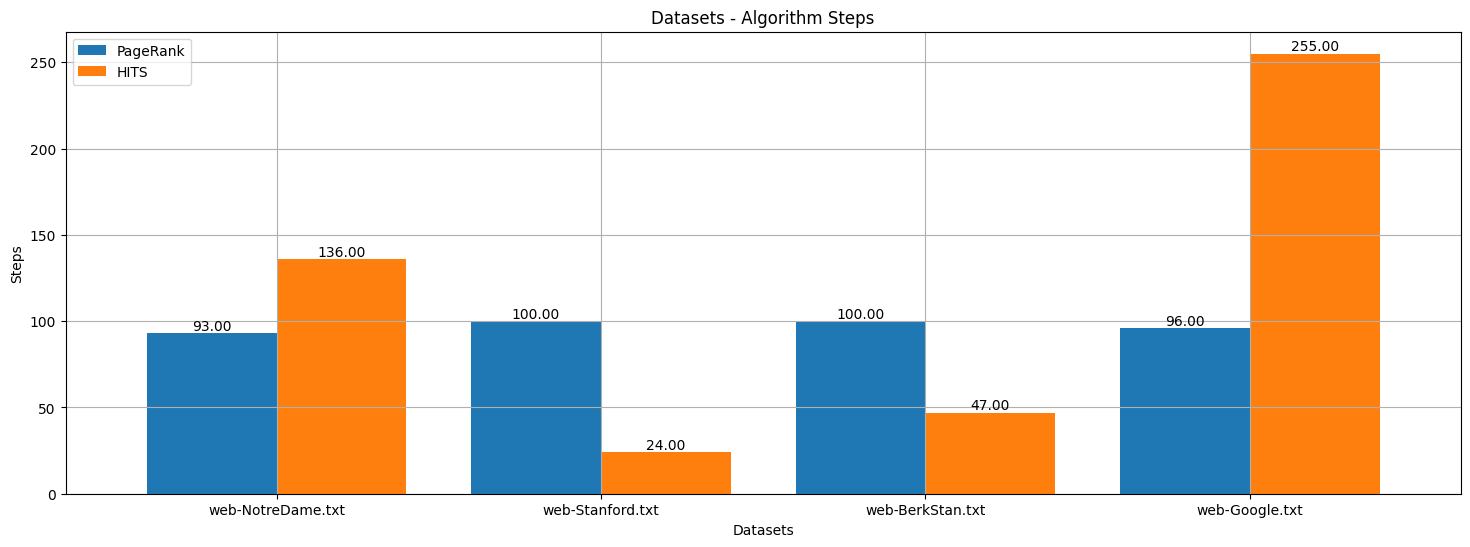

In [364]:
steps_results.set_index("dataset", inplace=True)

# Plotting
ax = steps_results.plot(kind="bar", figsize=(18, 6), width=0.8)
plt.xlabel("Datasets")#, fontsize=20)
plt.ylabel("Steps")#, fontsize=20)
plt.title("Datasets - Algorithm Steps")#, fontsize=25)
plt.xticks(rotation=0)#, fontsize=15)
#plt.yticks(fontsize=15)
plt.legend(title="Algorithms")
plt.grid()
ax.legend(loc=2, labels=["PageRank", "HITS"]) #, prop={'size': 15}

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')#, fontsize=15)

plt.show()

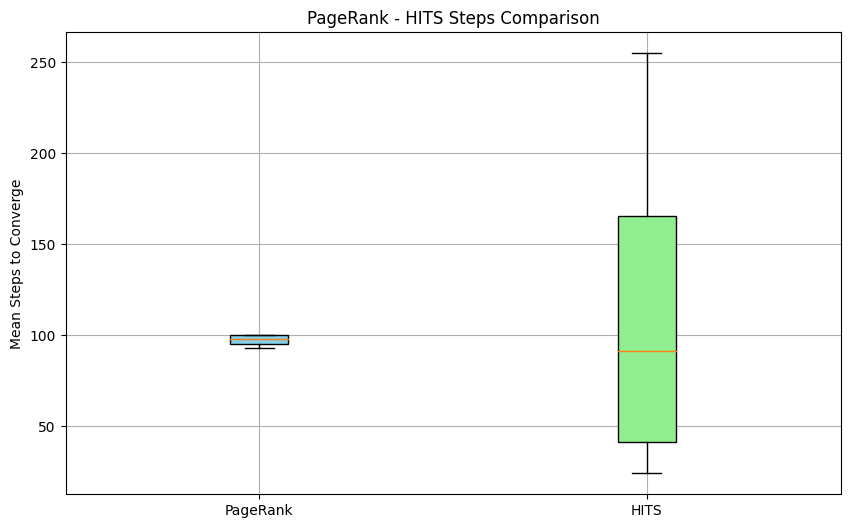

In [365]:
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(steps_results[['PR', 'HITS']].to_numpy(),
            patch_artist=True,
            labels=['PageRank', 'HITS'])  # will be used to label x-ticks)

# Define colors for the boxes
box_colors = ['skyblue', 'lightgreen']

# Color the boxes using the boxprops dictionary
for box, color in zip(boxplot['boxes'], box_colors):
    box.set_facecolor(color)

plt.ylabel("Mean Steps to Converge")
plt.title("PageRank - HITS Steps Comparison")
plt.xticks([1, 2], ['PageRank', 'HITS'])  # Custom tick labels
plt.grid()
plt.show()